In [2]:
#Installing necessary dependencies
!pip install --upgrade diffusers[torch] transformers scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 87.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 105.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.6 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1


In [3]:
#Make sure you have selected your hugging face token as well as during creating a new token make sure you select write token in role option
## you could find the token here https://huggingface.co/docs/hub/security-tokens
! huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) n
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [4]:
#Installing necessary dependencies
from torch import autocast
from diffusers import StableDiffusionPipeline
import cv2
from matplotlib import pyplot as plt

## Trying various stable diffusion models
In this we have tried to compare the results on different models of diffusion such as "CompVis/stable-diffusion-v1-4" , "runwayml/stable-diffusion-v1-5" , "stabilityai/stable-diffusion-2-base" , "stabilityai/stable-diffusion-2-1" for the same prompt "a photo of an astronaut riding a horse on mars"

Reference : https://huggingface.co/docs/diffusers/api/pipelines/stable_diffusion/text2img

In [ ]:
# make sure you're logged in with `huggingface-cli login`
pipe = StableDiffusionPipeline.from_pretrained(
	"CompVis/stable-diffusion-v1-4",
	use_auth_token=True
).to("cuda")

prompt = "a photo of an astronaut riding a horse on mars"
with autocast("cuda"):
    image = pipe(prompt).images[0]

image.save("astronaut_rides_horse.png")

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

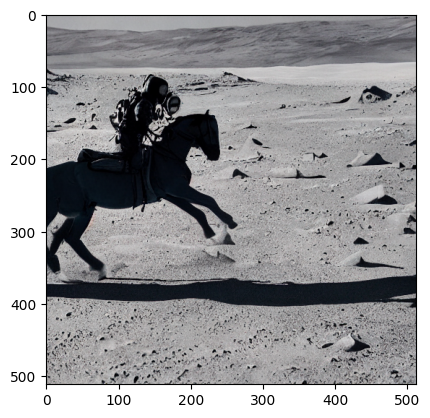

In [ ]:
image = cv2.imread("/content/astronaut_rides_horse.png")
plt.imshow(image)


In [9]:
pipe = StableDiffusionPipeline.from_pretrained(
	"runwayml/stable-diffusion-v1-5",
	use_auth_token=True
).to("cuda")

prompt = "a photo of an astronaut riding a horse on mars"
with autocast("cuda"):
    image = pipe(prompt).images[0]

image.save("astronaut_rides_horse_2.png")

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

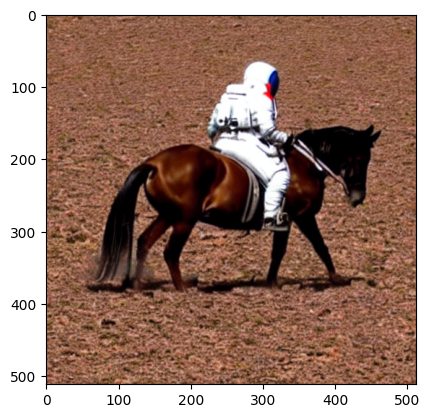

In [16]:
image = cv2.imread("/content/astronaut_rides_horse_2.png")[:,:,::-1]
plt.imshow(image)

In [12]:
pipe = StableDiffusionPipeline.from_pretrained(
	"stabilityai/stable-diffusion-2-base",
	use_auth_token=True
).to("cuda")

prompt = "a photo of an astronaut riding a horse on mars"
with autocast("cuda"):
    image = pipe(prompt).images[0]

image.save("astronaut_rides_horse_3.png")

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

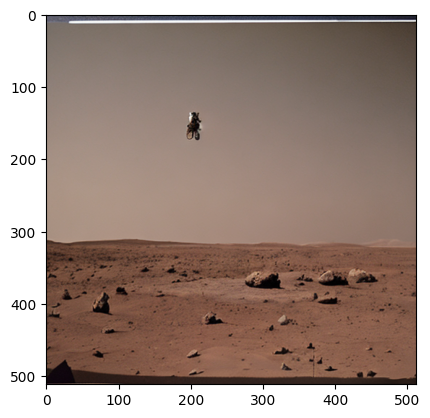

In [17]:
image = cv2.imread("/content/astronaut_rides_horse_3.png")[:,:,::-1]
plt.imshow(image)

In [14]:
pipe = StableDiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1",
    use_auth_token = True).to("cuda")
prompt = "a photo of an astronaut riding a horse on mars"
with autocast("cuda"):
    image = pipe(prompt).images[0]

image.save("astronaut_rides_horse_4.png")

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

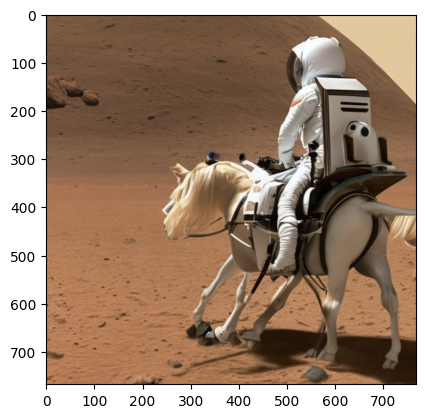

In [18]:
image = cv2.imread("/content/astronaut_rides_horse_4.png")[:,:,::-1]
plt.imshow(image)